<a href="https://colab.research.google.com/github/kasaiannn/HW/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Проект: анализ факторов, влияющих на суицидальные мысли среди студентов





### 1. Постановка задачи
В данном проекте мы исследуем датасет [Student Depression Dataset](https://www.kaggle.com/datasets/adilshamim8/student-depression-dataset/code) о студентах, чтобы выявить факторы, влияющие на наличие суицидальных мыслей. Мы проведем:
- Разведочный анализ данных (EDA) для понимания структуры и распределений.
- Статистический анализ ключевых признаков.
- Построение и оценку моделей для прогнозирования суицидальных мыслей.

### 2. Цели исследования
1. Определить, какие факторы наиболее сильно коррелируют с суицидальными мыслями.
2. Построить модели классификации для прогнозирования риска суицидальных мыслей.
3. Оценить качество моделей и выбрать лучшую.

### 3.Разведочный анализ (EDA)
 - Оценка качества данных
 - Изучение целевой переменной(Have you ever had suicidal thoughts?)
 - Исследование числовых признаков
 - Анализ категориальные признаки
 - Выявление взаимосвязей между переменными
 - Формулирование гипотез



### 4. Построение моделей
Мы используем три алгоритма классификации:
1. Логистическая регрессия  

2. Метод k-ближайших соседей (kNN)  

3. Случайный лес (Random Forest)  
   
### 5. Оценка моделей
- Confusion Matrix (точность, полнота, F1-score).
- ROC-AUC (площадь под кривой ошибок).
- Сравнение моделей по метрикам.

### 6. Предварительные гипотезы исследования
Мы предполагаем, что:
1. **Депрессия (Depression)** и **финансовый стресс (Financial Stress)** — ключевые факторы риска.
2. **Семейная история психических заболеваний (Family History of Mental Illness)** повышает вероятность суицидальных мыслей.
3. **Низкая удовлетворенность учебой/работой** коррелирует с целевой переменной.

### 7. Ожидаемые результаты
1. Выявление наиболее значимых факторов. Определим, какие именно показатели (депрессия, финансовый стресс, рабочие нагрузки и др.) сильнее всего связаны с суицидальными мыслями.

2. Сравнение эффективности моделей.

3. Наглядная визуализация результатов.


Команда: Бухарина Дарья, Касай Анна







In [76]:
# Импорт библиотек

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [87]:
# Загрузка датасета

df = pd.read_csv('student_depression_dataset.csv')

# Предварительный просмотр данных
print("Первые 5 строк датасета:")
df.head()

Первые 5 строк датасета:


,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


Датасет содержит следующие признаки:
- id – уникальный идентификатор.
- Gender – пол.
- Age – возраст.
- City – город проживания.
- Profession – профессия.
- Academic Pressure – уровень академической нагрузки.
- Work Pressure – уровень рабочей нагрузки.
- CGPA – средний балл.
- Study Satisfaction – удовлетворенность учебой.
- Job Satisfaction – удовлетворенность работой.
- Sleep Duration – продолжительность сна.
- Dietary Habits – пищевые привычки.
- Degree – уровень образования.
- Have you ever had suicidal thoughts? – целевая переменная (бинарная: Yes/No).
- Work/Study Hours – количество рабочих/учебных часов.
- Financial Stress – уровень финансового стресса.
- Family History of Mental Illness – наличие психических заболеваний в семье.
- Depression – наличие депрессии.



In [83]:
# Обработка пропущенных значений
print("\nКоличество пропущенных значений:")
print(df.isnull().sum())



Количество пропущенных значений:
id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
Sleep Duration Code                      0
dtype: int64


В нашем датасете нет пропущенных значений. Это значительно упрощает подготовку данных для анализа.

In [84]:
# Проверка дубликатов
print("\nКоличество дубликатов:", df.duplicated().sum())


Количество дубликатов: 0


In [81]:
print("\nИнформация о датасете:")
df.info()


Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 n

-  Мы видим, что переменная **Sleep Duration** имеет нетипичный вид, а именно присутствуют значения 'Less\More than n hours'. Проанализируем данный столбец.


In [110]:
# Выводим все уникальные значения
print("Уникальные значения в Sleep Duration :")
print(df['Sleep Duration'].unique())

Уникальные значения в Sleep Duration :
["'5-6 hours'" "'Less than 5 hours'" "'7-8 hours'" "'More than 8 hours'"
 'Others']


Так как всего 5 различных значений, то логичнее присвоить им порядковый номер.

In [79]:
# Ordinal encoding (порядковое кодирование)
sleep_ordinal = {
    "'Less than 5 hours'": 1,
    "'5-6 hours'": 2,
    "'7-8 hours'": 3,
    "'More than 8 hours'": 4,
    'Others': 5  # Как отдельная категория
}

df['Sleep Duration Code'] = df['Sleep Duration'].map(sleep_ordinal)


В ходе анализа данных мы обнаружили, что вместо NaN используется ? для переменной **Financial Stress**.

In [114]:
print("Уникальные значения в Financial Stress до обработки:")
print(df['Financial Stress'].unique())

# Подсчёт количества значений '?' в столбце 'Financial Stress'
count_question_marks = (df['Financial Stress'] == '?').sum()

print(f"Количество людей с '?' в Financial Stress: {count_question_marks}")

Уникальные значения в Financial Stress до обработки:
['1.0' '2.0' '5.0' '3.0' '4.0' '?']
Количество людей с '?' в Financial Stress: 3


Удалим данных людей из списка


In [158]:
df = df[df['Financial Stress'].str.strip() != '?']
df = df.dropna(subset=['Financial Stress'])


# Проверка
print("Уникальные значения в Financial Stress после обработки:")
print(df['Financial Stress'].unique())

# Подсчёт количества значений '?' в столбце 'Financial Stress'
count_question_marks = (df['Financial Stress'] == '?').sum()
print(f"Количество людей с '?' в Financial Stress: {count_question_marks}")

Уникальные значения в Financial Stress после обработки:
['1.0' '2.0' '5.0' '3.0' '4.0']
Количество людей с '?' в Financial Stress: 0


In [159]:
print("\nОписательная статистика:")
df.describe(include='all')



Описательная статистика:


,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
count,27898.000000,27898,27898.000000,27898,27898,27898.000000,27898.000000,27898.000000,27898.000000,27898.000000,27898,27898,27898,27898,27898.000000,27898,27898,27898.000000
unique,NaN,2,NaN,52,14,NaN,NaN,NaN,NaN,NaN,5,4,28,2,NaN,5,2,NaN
top,NaN,Male,NaN,Kalyan,Student,NaN,NaN,NaN,NaN,NaN,'Less than 5 hours',Unhealthy,'Class 12',Yes,NaN,5.0,No,NaN
freq,NaN,15546,NaN,1570,27867,NaN,NaN,NaN,NaN,NaN,8309,10316,6080,17656,NaN,6715,14397,NaN
mean,70442.953402,NaN,25.822174,NaN,NaN,3.141336,0.000430,7.656160,2.943974,0.000681,NaN,NaN,NaN,NaN,7.156570,NaN,NaN,0.585526
std,40642.015063,NaN,4.905651,NaN,NaN,1.381462,0.043994,1.470708,1.361122,0.044397,NaN,NaN,NaN,NaN,3.707598,NaN,NaN,0.492640
min,2.000000,NaN,18.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000
25%,35040.750000,NaN,21.000000,NaN,NaN,2.000000,0.000000,6.290000,2.000000,0.000000,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,0.000000
50%,70689.000000,NaN,25.000000,NaN,NaN,3.000000,0.000000,7.770000,3.000000,0.000000,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,1.000000
75%,105824.750000,NaN,30.000000,NaN,NaN,4.000000,0.000000,8.920000,4.000000,0.000000,NaN,NaN,NaN,NaN,10.000000,NaN,NaN,1.000000


# **1. Демографические характеристики**

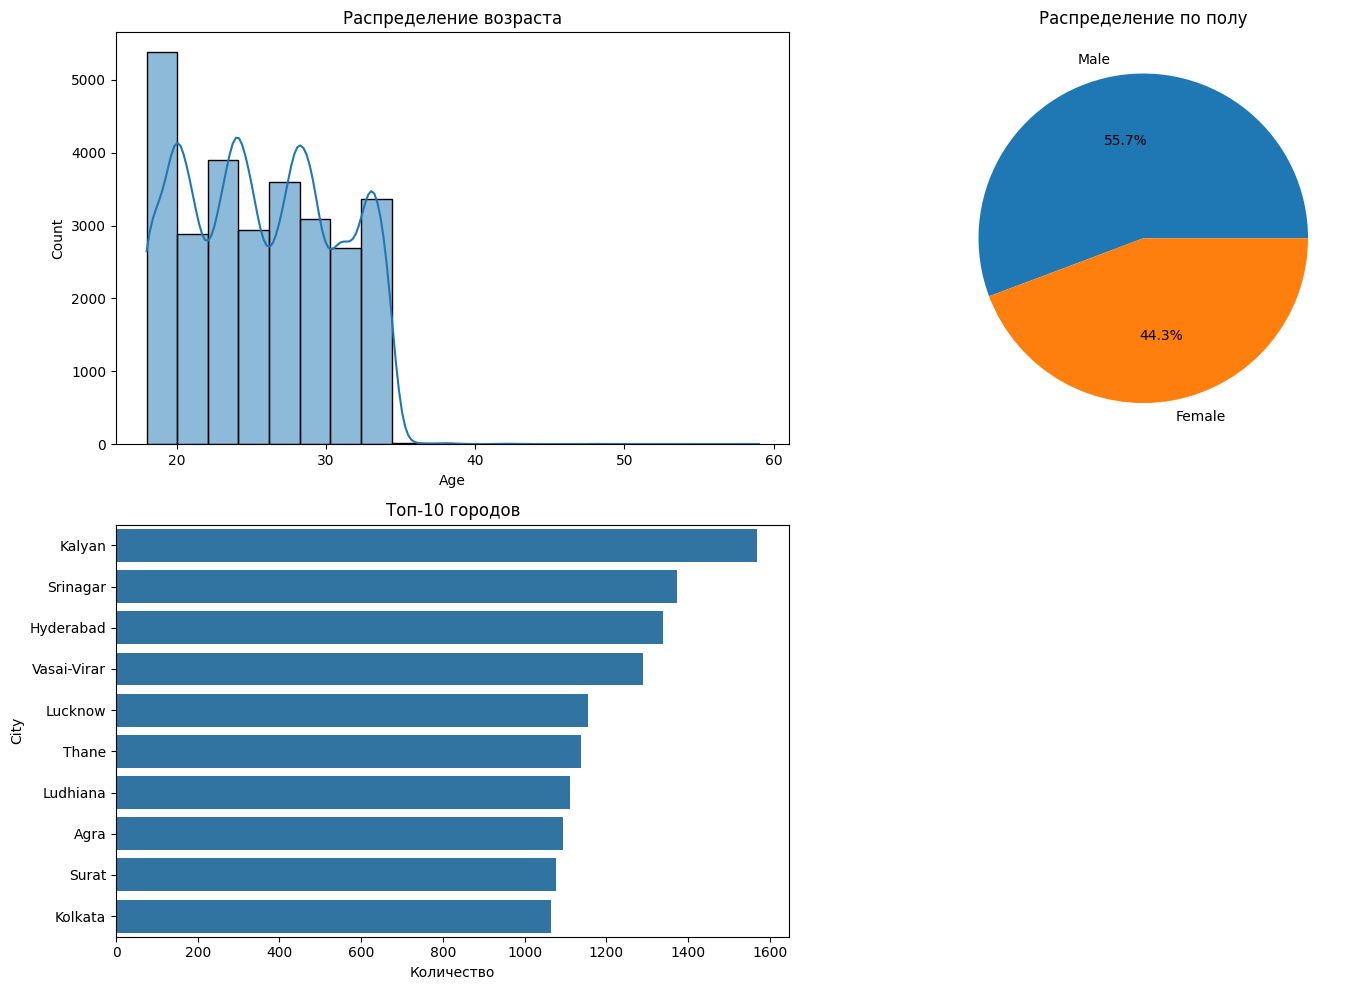

In [160]:
plt.figure(figsize=(15, 10))

# Возраст
plt.subplot(2, 2, 1)
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Распределение возраста')

# Гендер
plt.subplot(2, 2, 2)
gender_counts = df['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Распределение по полу')

# Города (топ-10)
plt.subplot(2, 2, 3)
top_cities = df['City'].value_counts().head(10)
sns.barplot(x=top_cities.values, y=top_cities.index)
plt.title('Топ-10 городов')
plt.xlabel('Количество')

plt.tight_layout()
plt.show()

# **2. Академические показатели**

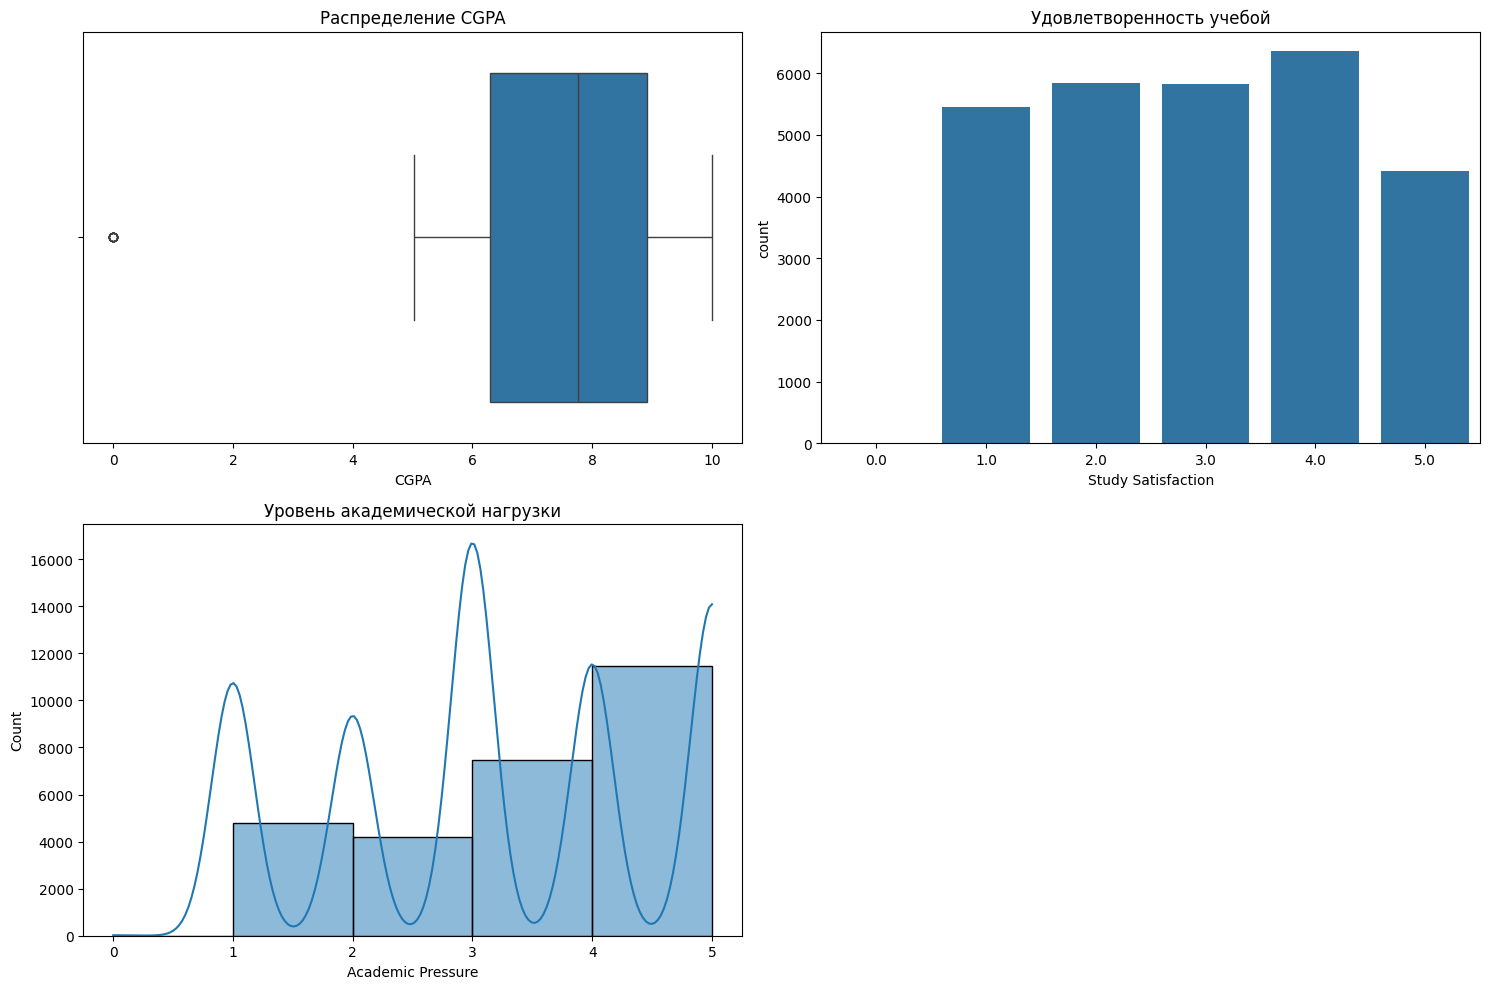

In [161]:
plt.figure(figsize=(15, 10))
# CGPA
plt.subplot(2, 2, 1)
sns.boxplot(x=df['CGPA'])
plt.title('Распределение CGPA')

# Удовлетворенность учебой
plt.subplot(2, 2, 2)
sns.countplot(x=df['Study Satisfaction'])
plt.title('Удовлетворенность учебой')

# Академическая нагрузка
plt.subplot(2, 2, 3)
sns.histplot(df['Academic Pressure'], bins=5, kde=True)
plt.title('Уровень академической нагрузки')

plt.tight_layout()
plt.show()

# **3. Психическое здоровье**

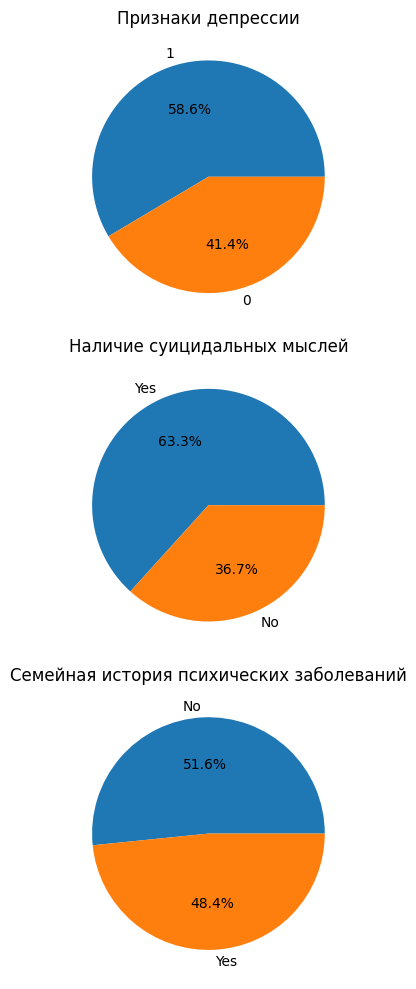

In [162]:
plt.figure(figsize=(15, 10))

# Депрессия
plt.subplot(3, 1, 1)
suicide_counts = df['Depression'].value_counts()
plt.pie(suicide_counts, labels=suicide_counts.index, autopct='%1.1f%%')
plt.title('Признаки депрессии')


# Суицидальные мысли
plt.subplot(3, 1, 2)
suicide_counts = df['Have you ever had suicidal thoughts ?'].value_counts()
plt.pie(suicide_counts, labels=suicide_counts.index, autopct='%1.1f%%')
plt.title('Наличие суицидальных мыслей')



# Семейная история
plt.subplot(3, 1, 3)
family_counts = df['Family History of Mental Illness'].value_counts()
plt.pie(family_counts, labels=family_counts.index, autopct='%1.1f%%')
plt.title('Семейная история психических заболеваний')

plt.tight_layout()
plt.show()

# **4. Образ жизни**

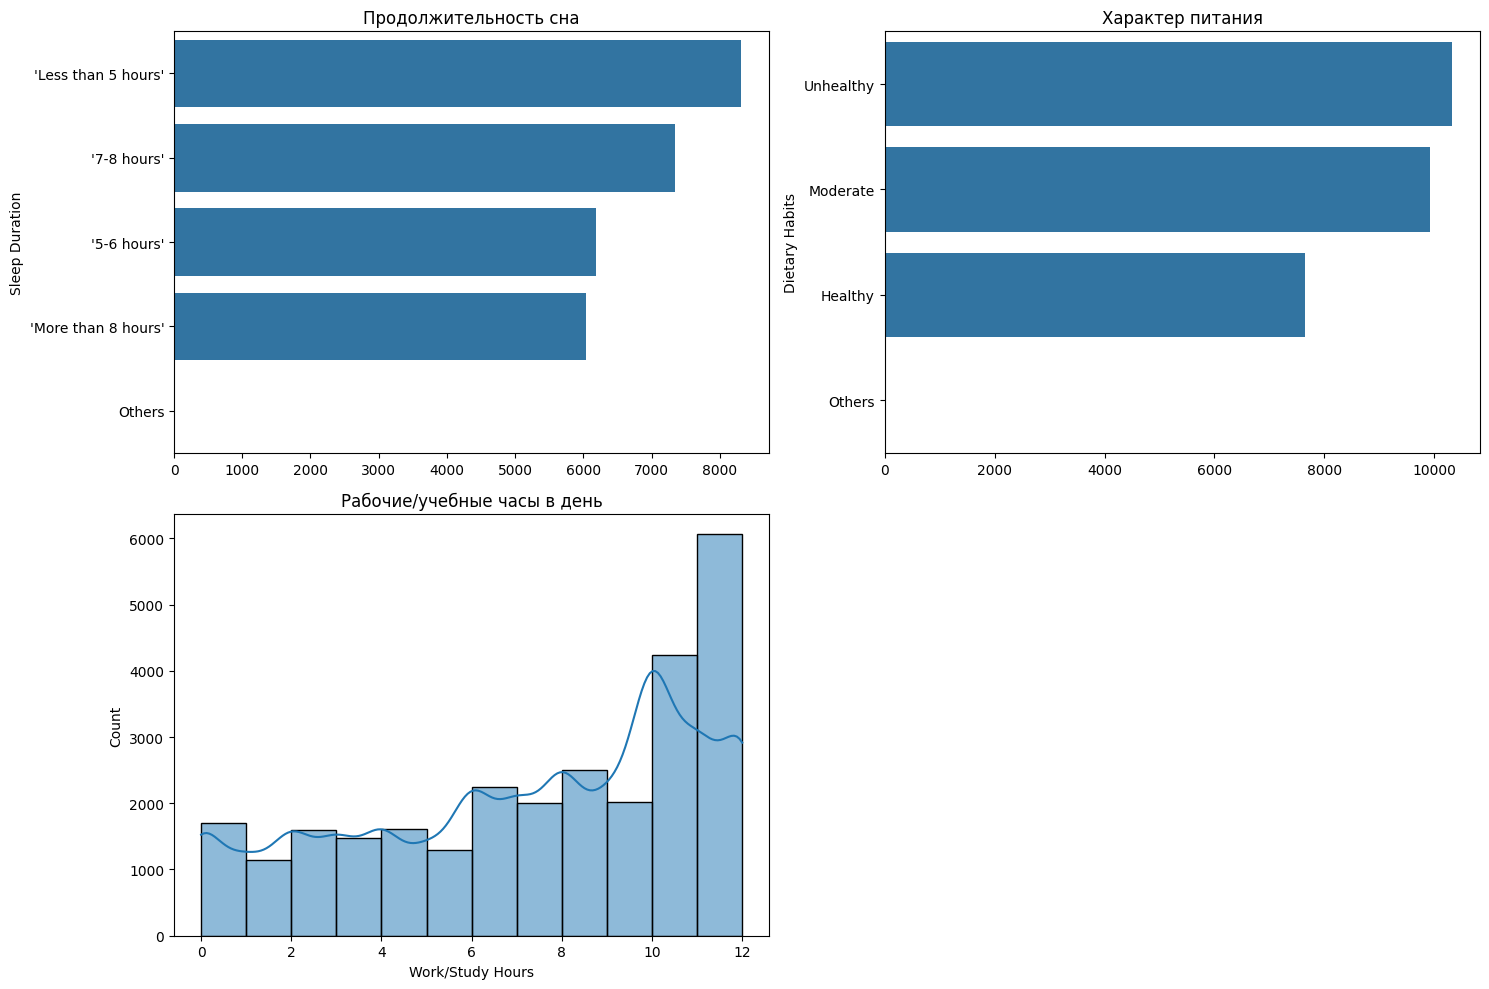

In [163]:
plt.figure(figsize=(15, 10))

# Продолжительность сна
plt.subplot(2, 2, 1)
sleep_counts = df['Sleep Duration'].value_counts()
sns.barplot(x=sleep_counts.values, y=sleep_counts.index)
plt.title('Продолжительность сна')

# Питание
plt.subplot(2, 2, 2)
diet_counts = df['Dietary Habits'].value_counts()
sns.barplot(x=diet_counts.values, y=diet_counts.index)
plt.title('Характер питания')

# Рабочие/учебные часы
plt.subplot(2, 2, 3)
sns.histplot(df['Work/Study Hours'], bins=12, kde=True)
plt.title('Рабочие/учебные часы в день')

plt.tight_layout()
plt.show()

# **5. Финансовый стресс**

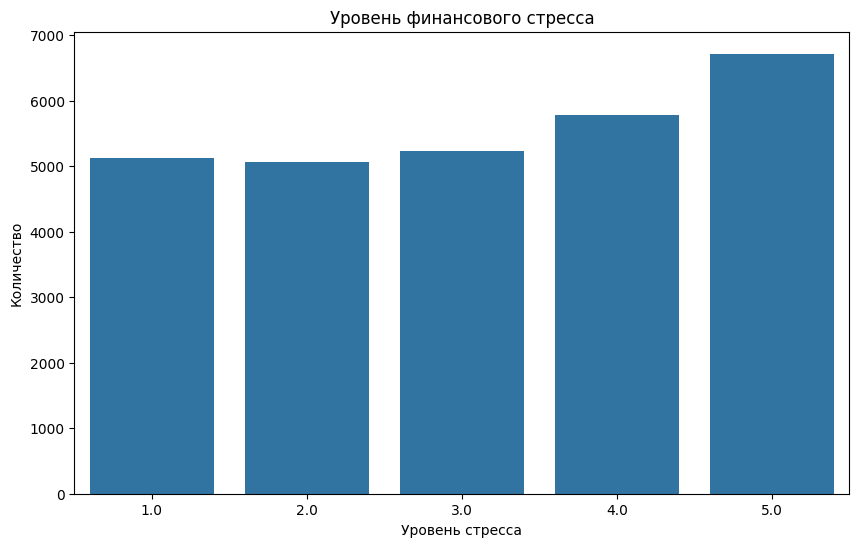

In [164]:
plt.figure(figsize=(10, 6))
stress_counts = df['Financial Stress'].value_counts().sort_index()
sns.barplot(x=stress_counts.index, y=stress_counts.values)
plt.title('Уровень финансового стресса')
plt.xlabel('Уровень стресса')
plt.ylabel('Количество')
plt.show()

# **Матрица корреляции**

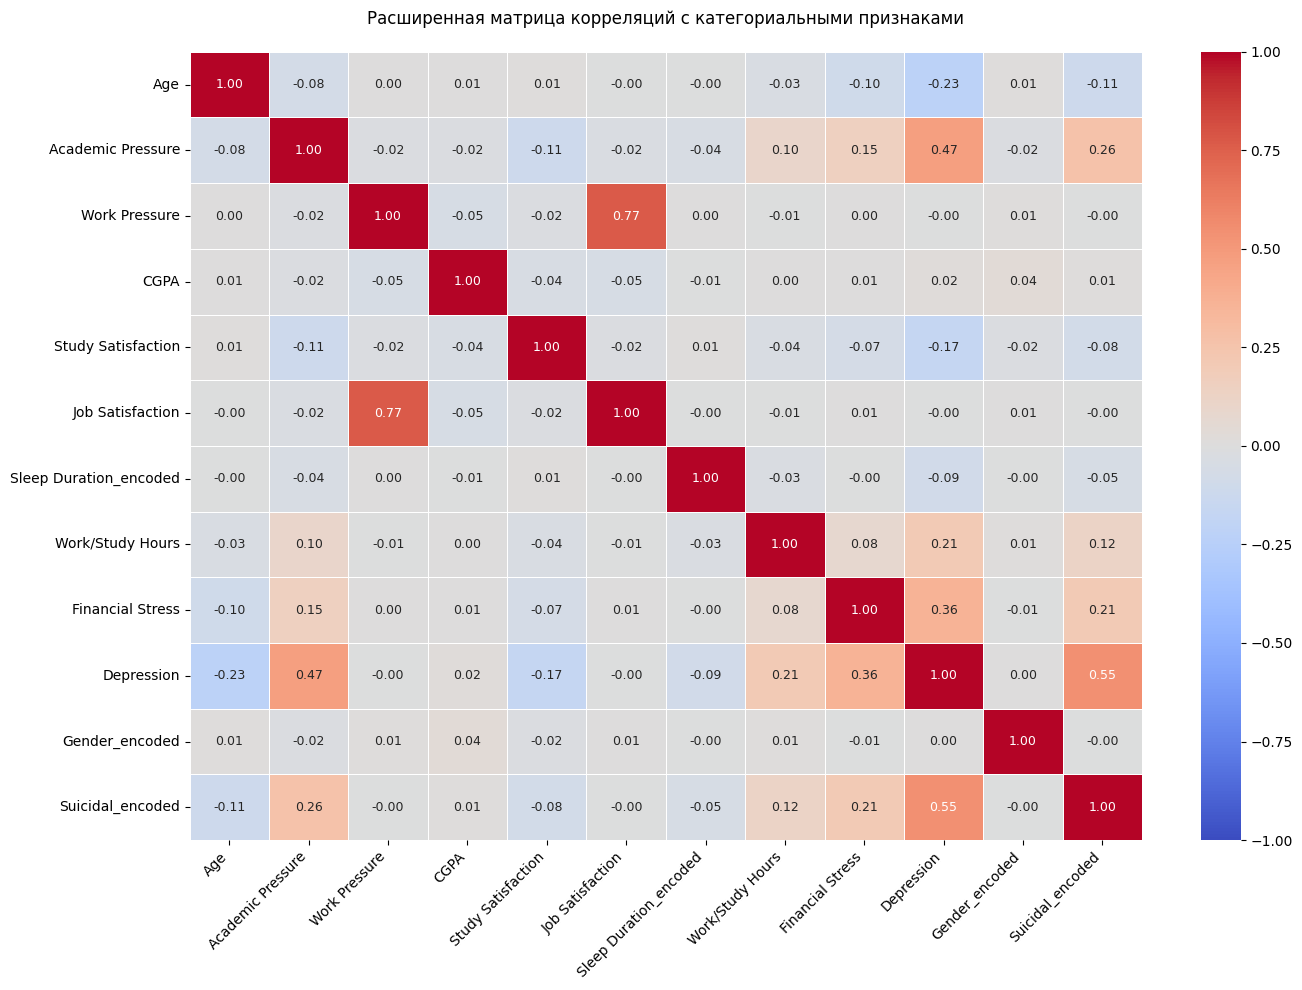

In [170]:
# Создаем копию данных для преобразований
df_corr = df.copy()

# Кодируем категориальные признаки
gender_map = {'Male': 1, 'Female': 0}
df_corr['Gender_encoded'] = df_corr['Gender'].map(gender_map)

suicidal_map = {'Yes': 1, 'No': 0}
df_corr['Suicidal_encoded'] = df_corr['Have you ever had suicidal thoughts ?'].map(suicidal_map)

# Уже закодированный Sleep Duration (как мы делали ранее)
sleep_map = {
    "'Less than 5 hours'": 1,
    "'5-6 hours'": 2,
    "'7-8 hours'": 3,
    "'More than 8 hours'": 4,
    'Others': 5
}
df_corr['Sleep Duration_encoded'] = df_corr['Sleep Duration'].map(sleep_map)

# Собираем все числовые и закодированные признаки
features_for_corr = [
    'Age',
    'Academic Pressure',
    'Work Pressure',
    'CGPA',
    'Study Satisfaction',
    'Job Satisfaction',
    'Sleep Duration_encoded',
    'Work/Study Hours',
    'Financial Stress',
    'Depression',
    'Gender_encoded',
    'Suicidal_encoded'
]

# Строим матрицу корреляций
plt.figure(figsize=(14, 10))
corr_matrix = df_corr[features_for_corr].corr()

# Улучшенная визуализация
sns.heatmap(corr_matrix,
            annot=True,
            cmap='coolwarm',
            fmt='.2f',
            vmin=-1,
            vmax=1,
            linewidths=0.5,
            annot_kws={'size': 9})

# Настраиваем подписи
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title('Расширенная матрица корреляций с категориальными признаками', pad=20)
plt.tight_layout()
plt.show()